<a href="https://colab.research.google.com/github/Rey1380/Contour-and-Template-matching/blob/main/Contour_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

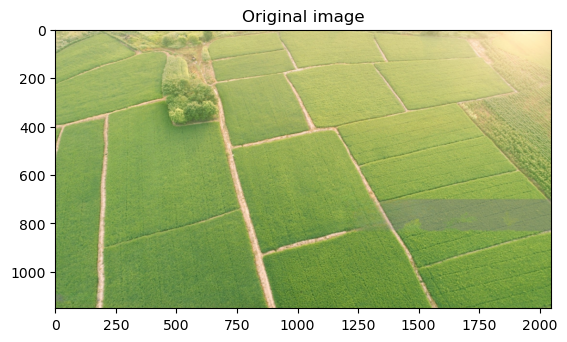

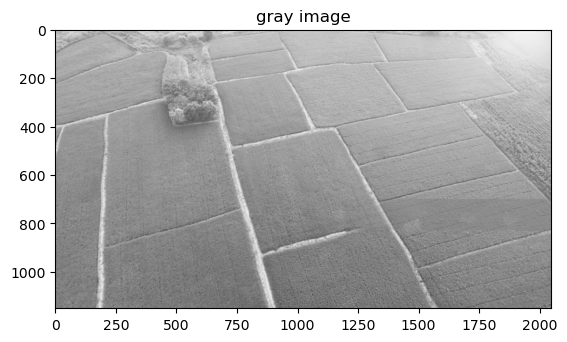

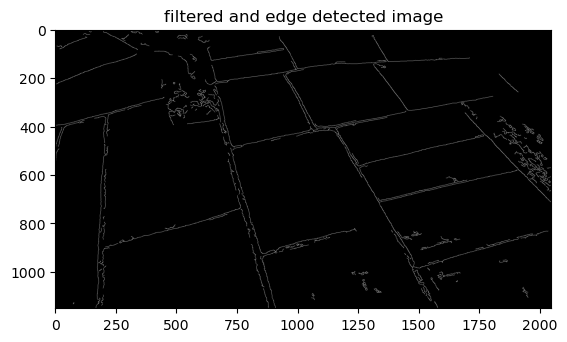

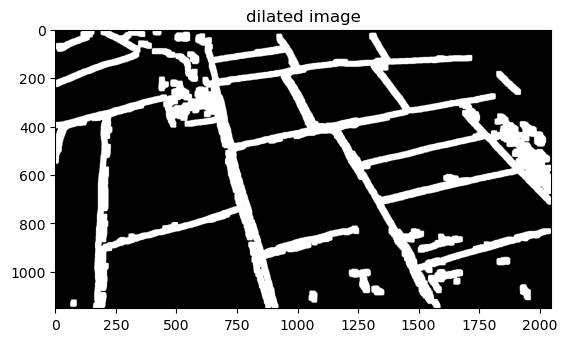

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#reading and showing image
image=cv2.imread(r"C:\Users\Lenovo\Desktop\AerialView.jpeg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.show()

# making the image gray and showing it
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title("gray image")
plt.show()


#using bilateral fiter and canny edge detection
bilateral = cv2.bilateralFilter(gray_image,9,75,95)
edged=cv2.Canny(bilateral,0,80)
plt.imshow(edged, cmap = "gray")
plt.title("filtered and edge detected image")
plt.show()
## kernel1 = np.ones((5,5),np.uint8)
## opening = cv2.morphologyEx(edged, cv2.MORPH_OPEN, kernel1)

#using guassianblur and thereshold for the filtered image
blur = cv2.GaussianBlur(edged,(13,13),0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY)[1]
## plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
## plt.title("grayimage")
## plt.show()

#use delation to connect the unconnected lines
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations = 6)
plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
plt.title("dilated image")
plt.show()


## kernel1=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
## kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
## morph1=cv2.morphologyEx(dilation,cv2.MORPH_TOPHAT,kernel2)
## plt.imshow(cv2.cvtColor(morph1, cv2.COLOR_BGR2RGB))
## plt.title("grayimage")
## plt.show()


Sorted contours areas(all contours):
[929583.5, 220343.0, 74031.5, 71954.0, 69040.0, 67675.5, 19754.0, 19456.5, 9037.5, 7377.5, 6460.5, 5647.5, 5128.0, 3768.5, 2524.5, 2343.0, 2179.5, 2058.5, 1872.0, 1703.0, 1690.5, 1518.5, 890.5, 805.5, 716.5, 165.0, 44.0, 30.5, 22.0, 21.0, 18.0, 16.0, 12.5, 11.5, 8.0, 5.5, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Intended Contours Areas after sorting:
[19456.5, 19754.0, 67675.5, 69040.0, 71954.0, 74031.5, 220343.0, 929583.5]


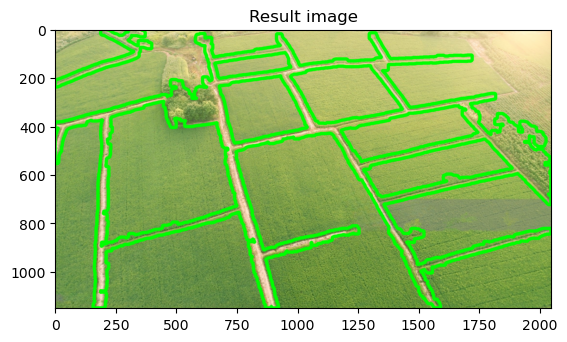

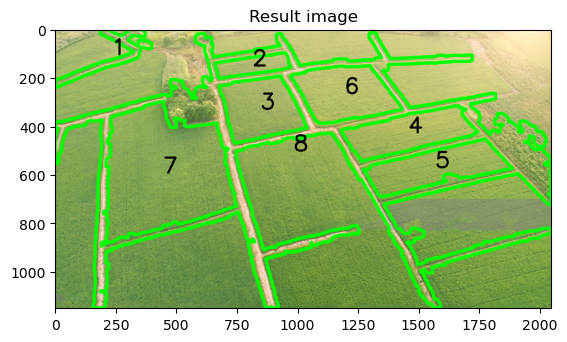

In [ ]:
#finding all contours in the dilated image
contours5, hierarchy5 = cv2.findContours(dilation, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
image_copy9 = image.copy()
image_copy10 = image.copy()

#Get all contours areas
def get_contour_areas(contours5):
    all_areas = []
    for cnt in contours5:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas
sorted_contours = sorted(contours5, key=cv2.contourArea, reverse=True)


#print all contours areas
print("Sorted contours areas(all contours):")
print(get_contour_areas(sorted_contours))


#finding the Intended contours areas and drawing them
realarea=[]
for i in contours5:
        if((cv2.contourArea(i))>10000):
            cv2.drawContours(image_copy9, i, -1, (0, 255, 0), 12, cv2.LINE_AA)
            realarea.append(cv2.contourArea(i))
print("Intended Contours Areas after sorting:")
print(sorted(realarea))






# Plotting Intended contours
plt.imshow(cv2.cvtColor(image_copy9, cv2.COLOR_BGR2RGB))
plt.title("Result image")
plt.show()

# # Iterate over our contours and draw one at a time
# for (i,c) in enumerate(sorted(realarea)):
#     M = cv2.moments(c)
#     cx = int(M['m10'] / M['m00'])
#     cy = int(M['m01'] / M['m00'])
# #     cv2.putText(image_copy9, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
# plt.imshow('Contours by area', image_copy9)
# # print(f"CCOMP: {hierarchy5}")
# # cv2.waitKey(0)
# # cv2.imwrite('contours_retr_ccomp.jpg', image_copy6)
# # cv2.destroyAllWindows()


#sort contours by their area
o=1

for x in sorted(realarea):
       for c in contours5:
           M= cv2.moments(c)
           cx = int(M['m10'] / M['m00'])
           cy = int(M['m01'] / M['m00'])
           if cv2.contourArea(c)==x:

                cv2.putText(image_copy9, str(o), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX,3, (0, 0, 0), 8)
                o=o+1
plt.imshow(cv2.cvtColor(image_copy9, cv2.COLOR_BGR2RGB))
plt.title("Result image with sorted areas")
plt.show()
